# Background

You are a data analyst responsible for InstaMagnet's product at Bookbuster. In order to enter the short video social media space, the product manager at InstaMagnet has proposed launching a new feature called "SnapFlicks." This feature will allow users to share short video clips on the platform in addition to photos, enriching the content and increasing user engagement.

However, the product manager is uncertain whether SnapFlicks will be well-received by existing users and is concerned that the introduction of short videos may cannibalize the consumption of image-based content on the platform. To avoid any negative impact on the existing app ecosystem after the feature is launched, the product manager needs data to substantiate the value of the new feature. They have turned to the company's data team for assistance.

As a data analyst in the company, you immediately think of A/B testing as a great solution to validate the worthiness of SnapFlicks and measure its potential value for InstaMagnet. You propose conducting an A/B test to evaluate whether SnapFlicks should be launched and determine its potential impact.

Now, let's go through the entire process of the experiment design and data collection.


---
# Experimental subjects

To avoid causing uncontrolled impacts on the overall user experience, we will conduct a small-scale experiment instead of testing all InstaMagnet users. Additionally, global products often undergo testing and feature rollout in different countries one by one. In this case, the product manager plans to enter the Latin American market, and you have selected Mexico as the test country.

From the existing InstaMagnet users in Mexico, you will extract a small portion of the traffic and evenly distribute these user IDs into two groups: Group A (control group) and Group B (experimental group). Users in Group A will remain unchanged and continue to see the original version of the InstaMagnet interface. Users in Group B, the experimental group, will experience a configuration change upon opening the app. They will see the SnapFlicks icon on the home screen and have access to the newly launched short video feature.

By conducting this small-scale experiment in Mexico, we can assess the impact of the SnapFlicks feature on user engagement and evaluate its potential success in the Latin American market.


# Experimental Metrics

We will formulate the hypotheses we want to validate in the experiment:

H0: The original version of InstaMagnet is more favored by users.
H1: The new version of InstaMagnet with SnapFlicks is more favored by users.

H0 - Hypothesis to be challenged, H1 - Hypothesis to be supported.

However, measuring the level of user favorability is a broad concept, so we need to quantify it. Therefore, you need to determine a set of metrics that will allow us to evaluate the level of user favorability for both the experimental group and the control group.

### North Star Metric / One Metric That Matters
We need to determine the North Star Metric for the experiment. In this case, we expect the new feature to increase the average time users spend on InstaMagnet. Therefore, we will define the average usage duration per user as the North Star Metric. The North Star Metric represents the absolute core metric that is highly relevant to the current stage of the product and business/strategy. Once established, it serves as the guiding star, leading the team in the same direction to improve this metric. Since InstaMagnet is an ad-supported free platform, the longer users spend on the platform, the higher the potential ad revenue. Hence, user usage duration is the most important metric that the company strives to improve across the board.

### Guardrail Metric
User retention in InstaMagnet is also a crucial aspect of our focus. We want to ensure that any new feature does not have a negative impact on user retention. Therefore, we have selected the next-day retention rate as the guardrail metric. The guardrail metric is the target metric that should not significantly decrease while we aim to optimize the North Star Metric. It serves as a basic sanity check in A/B experiments, helping to ensure the quality of the experiment and measure if the experiment aligns with the long-term interests of the business without disrupting other critical objectives. Its purpose is to ensure the smooth operation of the product.

### Other Metrics
Other observable process metrics include average InstaMagnet usage frequency per user, penetration rate of the SnapFlicks feature, and more.


# Minimum Sample Size

To determine the minimum sample size, we need to confirm the Minimum Detectable Effect (MDE) based on the expected improvement in the target metric. By inputting the recent metric variance of the user population and defining α and β, we can calculate the minimum sample size.

MDE (sometimes referred to as delta) represents the expected difference in the mean values of the target metric between the A and B groups in the A/B experiment. When using the formula, the input should be the absolute difference. If there is an expected relative difference, it needs to be transformed into an absolute difference by multiplying the metric value by the relative difference (e.g., 1% = 0.01) to obtain delta.

α represents the Type I error rate (False Positive: erroneously rejecting the null hypothesis), and β represents the Type II error rate (False Negative: erroneously accepting the null hypothesis). The typical values for α are 0.05, and for β, they are usually 0.1 or 0.2. Power can be calculated as 1 - β, representing the probability of correctly rejecting the null hypothesis when it is false.


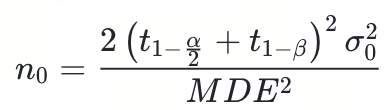

In [1]:
from scipy.stats import norm
#norm.ppf() takes a percentage and returns a standard deviation multiplier for what value that percentage occurs at for a one-tail test on a standard normal distribution
norm.ppf(0.975)

1.959963984540054

Due to our expected improvement metric being the average usage duration per user on Instagram, we need to utilize the current average value of this metric in the overall user population during the calculation of the minimum sample size. Additionally, we will input the desired Minimum Detectable Effect (MDE), as well as the values for α and β. The commonly used values for α and β in the industry are typically set as 0.05 and 0.8, respectively.

In [2]:
alpha = 0.05
power = 0.8
delta = 450*0.005 # Statistically, the average usage duration of InstaMagnet per person over the past two weeks is calculated. It is expected that SnapFlicks will bring a minimum improvement of 0.5% to the product metric.
SD = 120 # The standard deviation of the metric based on the data collected over the past two weeks is calculated.
variance = SD**2
sample_size = 2 * (norm.ppf(1 - alpha / 2) + norm.ppf(power)) ** 2 * variance / (delta ** 2)
#calculate the minimum sample size
print('The minimal sample size for each group is',round(sample_size))

The minimal sample size for each group is 44651


According to our calculations, the minimum sample size required for a single experimental group is X. Since we have two groups, the minimum sample size required for the experiment would be approximately 2X.

# Experimental Cycle
Once the minimum sample size is calculated, we can proceed with conducting the experiment using the company's A/B testing platform. The platform should be able to ensure proper allocation and segmentation of the sample traffic, ensuring random and even distribution between the experimental and control groups. Considering the current average daily active user count of InstaMagnet and the proportion of traffic we plan to use for this experiment, we can estimate the duration required for the experiment to run.

In [3]:
DAU = 8000000 # The current average daily active user count in Mexico.
proportion = 0.001 #A single experiment consumes 0.1% of the traffic.
total_sample = sample_size*2 # The minimum sample size for a single group multiplied by 2 groups.
test_duration = total_sample / (DAU*proportion)
# Compute the cycle
print('AB test result will be available after',round(test_duration),'days')

AB test result will be available after 11 days


# Experiment Analysis
After observing for a sufficient duration and collecting an adequate sample size, we can proceed with the experiment analysis. We will close the experiment, gather data from both the experimental and control groups, and calculate the differences and significance of the metric means between the two groups based on the predetermined metrics.

For different types of metrics, we need to apply different statistical methods for confidence interval analysis. By utilizing appropriate statistical techniques, we can assess the significance and confidence of the observed differences in the metrics between the experimental and control groups.

Please let me know if you need any further assistance.

# Hypothesis Testing for Average Metrics

Hypothesis testing for average metrics, such as average app usage duration or average app usage frequency, typically involves the use of a Two Sample t-test, also known as the Student's t-test.

This test assumes that the total population variances of the experimental group and the control group are equal but unknown. It uses sample variances as estimates of the population variances and aims to determine if the means of the two populations are statistically different.

When conducting hypothesis testing for average metrics, the following assumptions need to be satisfied:

1) Normality: The populations should follow a normal distribution. If the populations do not follow a normal distribution, data transformation or non-parametric testing methods may be required.
2) Independence: The samples should be independent of each other, meaning that the results of each sample should not be influenced by other samples. This implies avoiding the use of duplicate samples during sampling.
3) Homogeneity of variance: The assumption is that the variances of different samples are equal. If the variances are unequal, data stabilization techniques or non-parametric testing methods may be necessary.
4) Adequate sample size: Sufficient sample size is required to ensure the accuracy of the hypothesis test results.

Please let me know if you need any further assistance.


In [4]:
#input data
import pandas as pd
dfA = pd.read_excel('AB_test_sample.xlsx', sheet_name = 'GroupA')
dfB = pd.read_excel('AB_test_sample.xlsx', sheet_name = 'GroupB')

In [5]:
#The control group data.
dfA.describe()

,user_id,app use hours,app use times,new feature,app used after test started
count,4.499600e+04,44996.000000,44996.000000,44996.0,44996.000000
mean,5.506530e+07,450.001695,9.981509,0.0,0.401391
std,2.601348e+07,119.325336,2.985547,0.0,0.490185
min,1.000036e+07,0.854408,1.000000,0.0,0.000000
25%,3.251697e+07,369.792762,8.000000,0.0,0.000000
50%,5.495975e+07,449.979288,10.000000,0.0,0.000000
75%,7.784610e+07,530.479653,12.000000,0.0,1.000000
max,9.999990e+07,942.694504,22.000000,0.0,1.000000


In [6]:
#The experimental group data.
dfB.describe()

,user_id,app use hours,app use times,new feature,app used after test started
count,4.499600e+04,44996.000000,44996.000000,44996.000000,44996.000000
mean,5.498191e+07,453.075374,10.100276,0.161948,0.398347
std,2.603558e+07,130.091910,3.310604,0.368407,0.489563
min,1.000101e+07,2.162968,1.000000,0.000000,0.000000
25%,3.238677e+07,365.476146,8.000000,0.000000,0.000000
50%,5.493478e+07,453.135370,10.000000,0.000000,0.000000
75%,7.761172e+07,540.777622,12.000000,0.000000,1.000000
max,9.999939e+07,1047.749295,24.000000,1.000000,1.000000


# Assumptions for Hypothesis Testing on Average Metrics

After observing the statistical data of the experimental group and the control group, we can make a preliminary assessment of whether the data satisfies the assumptions for hypothesis testing on average metrics. Let's review each assumption:

1) Normality: To verify this assumption, we need to further validate whether the data follows a normal distribution.

2) Independence: The independence of samples is ensured by the experimental platform during the allocation process, so we do not need to re-validate this assumption.

3) Equality of variances: From the statistical data, we can see that the standard deviations of the metrics in both groups are relatively similar, indicating that this assumption is satisfied.

4) Adequate sample size: The sample sizes of both groups exceed the minimum sample size calculated earlier, indicating that this assumption is satisfied.

Please let me know if you need any further assistance.


## The average usage duration per person.

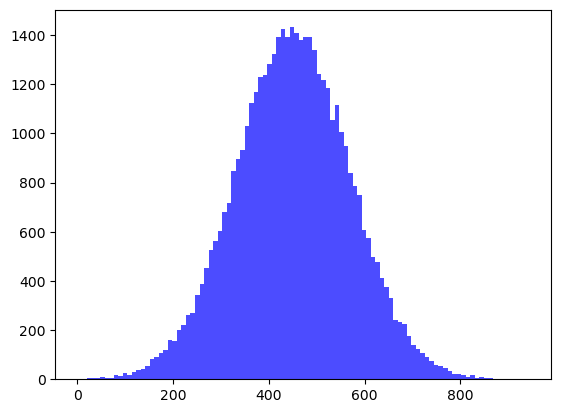

In [7]:
import matplotlib.pyplot as plt
plt.hist(dfA['app use hours'], bins=100, color='blue', alpha=0.7)
plt.show()

In [8]:
#narmality test
import scipy.stats as stats
k2, p = stats.normaltest(dfA['app use hours'])
alpha = 0.05  # significance level
if p < alpha:
    print("Sample data does not follow normal distribution, p =", p)
else:
    print("Sample data follows normal distribution, p =", p)

Sample data follows normal distribution, p = 0.4538848510421052


In [9]:
#T-test
import scipy.stats as stats

group1 = dfA['app use hours']
group2 = dfB['app use hours']
stats.ttest_ind(a=group1, b=group2, equal_var=True)


Ttest_indResult(statistic=-3.6934297450364797, pvalue=0.0002213804493662174)

Since the p-value is less than or equal to 0.05, we reject the null hypothesis, indicating that the average app usage duration in the experimental group is significantly greater than that in the control group.
Considering that the average app usage duration is our primary metric, this result is crucial in determining the success of the experiment.

## The average number of app usage per person.

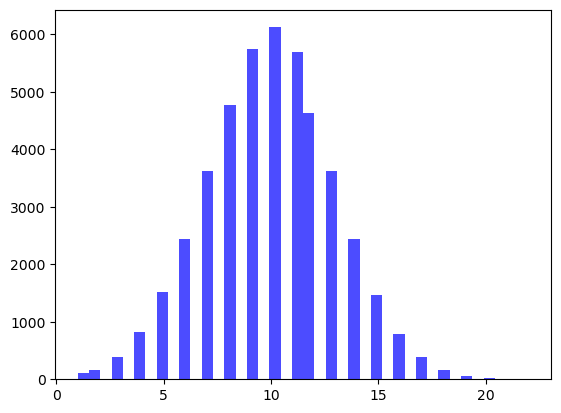

In [10]:
import matplotlib.pyplot as plt
plt.hist(dfA['app use times'], bins=40, color='blue', alpha=0.7)
plt.show()

In [11]:
#normality test
import scipy.stats as stats
k2, p = stats.normaltest(dfA['app use times'])
alpha = 0.05  # significance level
if p < alpha:
    print("Sample data does not follow normal distribution, p =", p)
else:
    print("Sample data follows normal distribution, p =", p)

Sample data follows normal distribution, p = 0.4616520932198871


In [12]:
#average number of app usage per person
group1 = dfA['app use times']
group2 = dfB['app use times']
stats.ttest_ind(a=group1, b=group2, equal_var=True)

Ttest_indResult(statistic=-5.6512085520876845, pvalue=1.5980360297263646e-08)

Likewise, the average number of app usage per person in the experimental group is significantly higher than that in the control group.

# Hypothesis testing for retention metrics

Retention is a typical binary event (stay or not stay, that's the question).
Next-day app retention (split by enrollment date):
Numerator = Cumulative retention count (users who enrolled on the 1st and used the app on the 2nd day) + (users who enrolled on the 2nd and used the app on the 3rd day) + ... + (users who enrolled on the 30th and used the app on the 31st day).
Denominator = Cumulative app usage count (cumulative count of users who enrolled).

Depending on the approximation method used, the hypothesis test for the two-sample odds of a binomial distribution can be based on either the chi-square distribution or the normal distribution.

#### Method 1: Chi-square test

In [13]:
import scipy.stats as stats
from scipy.stats import chi2
import numpy as np

Pearson's chi-squared test assumes that both samples are derived from a binomial distribution, and the success probabilities in the two samples are equal. When conducting Pearson's chi-squared test, it is necessary to calculate the differences between the observed and expected values, square the differences, and divide them by the expected values to obtain the chi-squared statistic. Then, the chi-square distribution is used to calculate the p-value, which helps determine the significance of the differences.


There are several assumptions or requirements that must be met in order to use Pearson's chi-squared test:  
1)The data must be independent  
2)The data must be drawn from a random sample  
3)The data must be categorical and the categories must be mutually exclusive, meaning that each observation cannot belong to more than one category  
4)The sample size should be sufficiently large

In [14]:
import statsmodels.stats.proportion as proportion
stay_a = sum(dfA['app used after test started']) #The cumulative retention count for Group A.
stay_b = sum(dfB['app used after test started']) 
pop_a = len(dfA) #The cumulative enrollment count for Group A.
pop_b = len(dfB)
retained = np.array([stay_a, stay_b])
all_obs = np.array([pop_a, pop_b])

chisq, pvalue, table = proportion.proportions_chisquare(retained, all_obs)
print('Results are chisq = %.3f, pvalue = %.3f'%(chisq, pvalue))

Results are chisq = 0.869, pvalue = 0.351


Method 2: Z-test

The proportions z-test, also known as a z-test for proportions, is a statistical method used to compare the difference in proportions between two binomial distributions. It helps determine whether the proportions in two samples are equal or not.

In [15]:
from statsmodels.stats.proportion import proportions_ztest
zscore, pvalue = proportions_ztest(retained, all_obs)
print('zscore = {:.4f}, pvalue = {:.4f}'.format(zscore, pvalue))

zscore = 0.9323, pvalue = 0.3512


Based on the results of the two methods mentioned above, although the retention rate of the experimental group (39.8%) is slightly lower than that of the control group (40.1%), the calculated p-value > 0.05 indicates that this difference is not significant.

Since the next-day retention rate is our barrier metric and the expectation is non-inferiority, considering that there is no significant difference in retention rates between the experimental and control groups, the barrier metric has been validated.

# Experimental Conclusion

After analysis, it has been found that the Polar Star metric in this experiment showed significant gains, while the Guardrail metric did not deteriorate. Therefore, the new feature can be deployed.

However, it is important to note that the penetration rate of the new feature in the experimental group was less than 20%. This indicates that a majority of the users in the experimental group did not actually click to enter the SnapFlicks interface. In such cases, it may be necessary to discuss with the development and product management teams to identify the root causes of this data phenomenon. Here are a few hypotheses and corresponding validation methods that can be considered:

1) Low version coverage: The new version of SnapFlicks requires users to update to the latest version to experience it. It is possible that only a small portion of the experimental group chose to update. This can be validated by comparing the penetration rates of the new version between the experimental and control groups.

2) Performance issues: It is possible that performance problems prevented the SnapFlicks button from displaying successfully on some devices, or users clicked on it but couldn't enter the SnapFlicks interface. Observing performance metrics such as button display rates and success rates of user clicks can help validate this hypothesis.

3) User reach: The SnapFlicks entry on the homepage may be too obscure, and many users may not have noticed it. Understanding this through user surveys or research can be helpful. Additionally, suggesting different entry solutions for AB testing to the UI designers can also be considered.

Regardless of the reasons, we can be certain that even if only a small portion of the experimental group experienced the new feature, it has already brought significant benefits. Therefore, based on the data, we can provide feedback to the product managers and recommend that their next optimization focus should be on increasing the penetration rate of SnapFlicks among InstaMagnet users, in order to achieve greater overall benefits.
